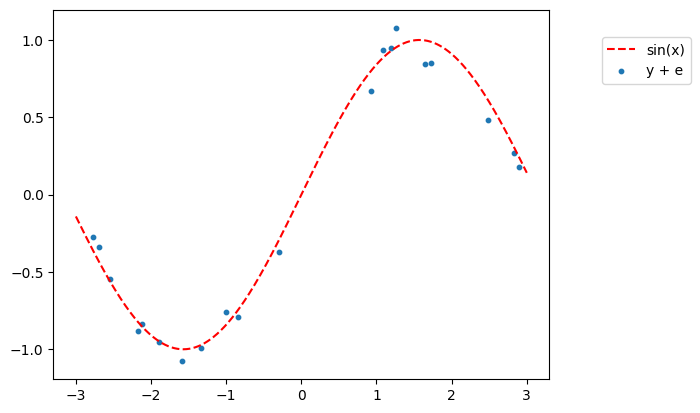

PyObject <matplotlib.legend.Legend object at 0x7ff640422650>

In [254]:
using PyPlot
using Revise

n = 20
s = 0.08

a = -3.0
b = 3.0

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


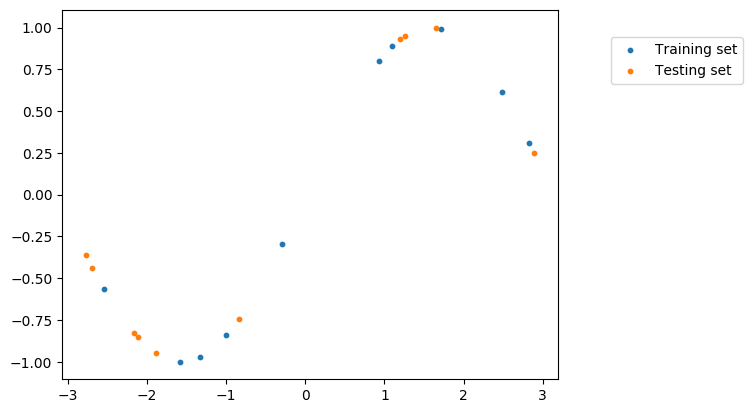

PyObject <matplotlib.legend.Legend object at 0x7ff640398c90>

In [255]:
ind = collect(1:n)

#ind_train = rand(1:n, Int(n/2))
ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [256]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sum(dif)
end

function grad_descend(x, w0, d, step)
    i = 0
    g_norm = 1.0    
    while i<1.0e9 && g_norm > 0.05
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 1.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end




grad_descend (generic function with 2 methods)

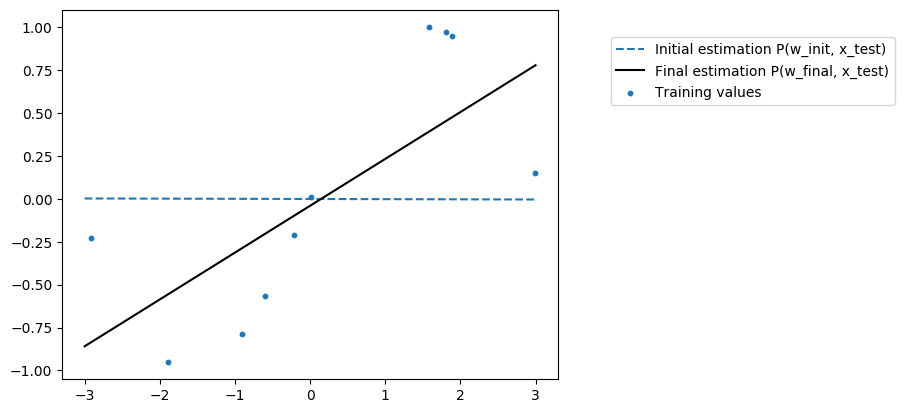

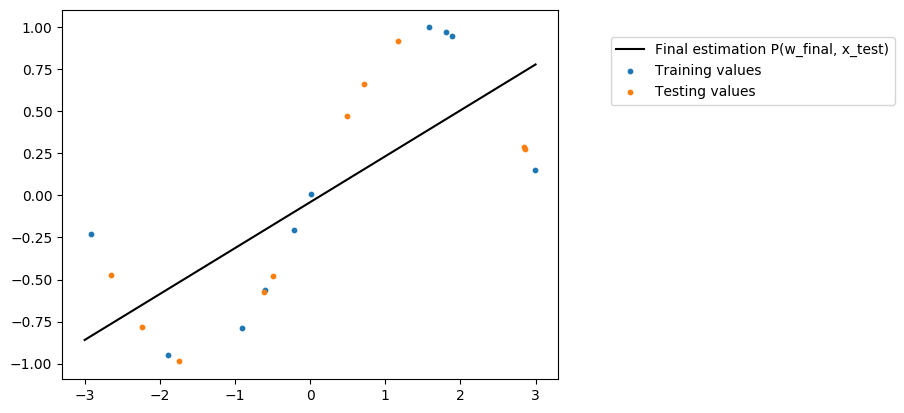

iter = 1000000
  w = [-0.005274599083994622, 0.13046882838748183]
  loss = 0.5046296916560717
g norm = 9.31508334519178

iter = 2000000
  w = [-0.010589392912793188, 0.19869163665523623]
  loss = 0.5416018137458292
g norm = 4.859820087997263

iter = 3000000
  w = [-0.015883139408156128, 0.2341370727682422]
  loss = 0.5101623420671209
g norm = 2.5627837284617856

iter = 4000000
  w = [-0.020707294886594455, 0.25258784214279667]
  loss = 0.45242586188583744
g norm = 1.3851660181707182

iter = 5000000
  w = [-0.024912367687041678, 0.26222075443379583]
  loss = 0.3885535220209232
g norm = 0.7875572155770597

iter = 6000000
  w = [-0.028488788018811374, 0.2672732499061675]
  loss = 0.3276353505082973
g norm = 0.48716821404824745

iter = 7000000
  w = [-0.031487199590829754, 0.2699422199087036]
  loss = 0.273271948751364
g norm = 0.33366433671624884

iter = 8000000
  w = [-0.03397939283047773, 0.27136740520498054]
  loss = 0.22642096556715435
g norm = 0.24876261270853298

iter = 9000000
  w 

PyObject <matplotlib.legend.Legend object at 0x7ff64055b590>

In [250]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 2
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x, w_init, d, 1.0e-8)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


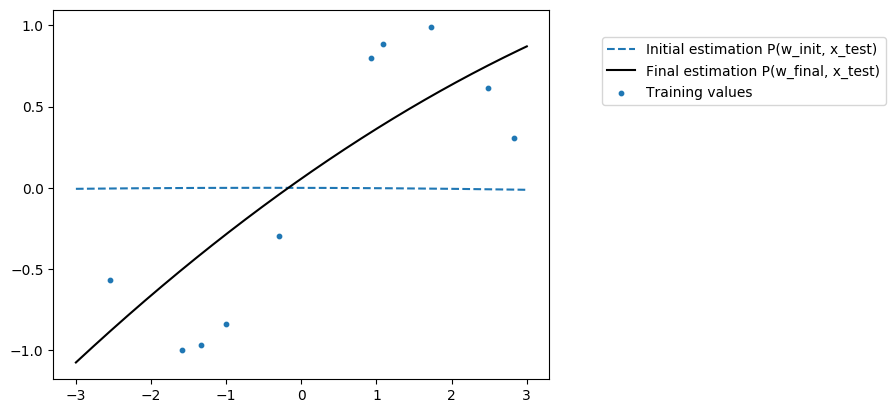

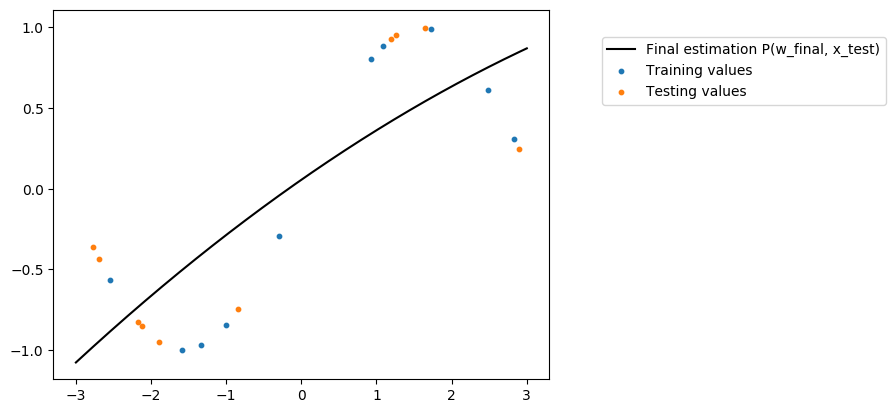

iter = 1000000
  w = [0.00012718011854326387, 0.16762129660369687, -0.013864963170219746]
  loss = -0.4307011262332938
g norm = 11.420664569502037

iter = 2000000
  w = [0.004506355382190609, 0.24862211416273672, -0.011554293353687737]
  loss = -0.432537858960493
g norm = 5.523143655590278

iter = 3000000
  w = [0.008721066516887746, 0.2877157169552395, -0.010690247805406332]
  loss = -0.4098551756168711
g norm = 2.6890476222401034

iter = 4000000
  w = [0.01269908223601565, 0.30659506144841747, -0.01062213898522373]
  loss = -0.3857042912505365
g norm = 1.3406454713980587

iter = 5000000
  w = [0.016436153207480944, 0.31572092648217653, -0.01091693945880823]
  loss = -0.36182687051416107
g norm = 0.7198860380312

iter = 6000000
  w = [0.019938755724798644, 0.3201401034875273, -0.011365538518818837]
  loss = -0.33887816777381585
g norm = 0.45601362027682807

iter = 7000000
  w = [0.023217706652871952, 0.322287480279436, -0.01186841357832714]
  loss = -0.31712080616831817
g norm = 0.353

PyObject <matplotlib.legend.Legend object at 0x7ff640764f50>

In [258]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 3
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-7)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation P(w_init, x_test)")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)
